# SABE Model Results Comparison

This notebook compares the results of three different modeling approaches for the SABE dataset:
1. Linear regression with normalization and dummy variables
2. Linear regression without dummy variables
3. Decision tree models

Each modeling approach was applied to three target variables:
- minimental (objective cognitive measure)
- memoria_subjetiva (subjective memory assessment)
- coherencia (coherence between objective and subjective measures)

In [1]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 1. Performance Metrics Comparison

In [2]:
# Create a dataframe with performance metrics for all models
models = [
    # Regression with normalization/dummies
    {'target': 'memoria_subjetiva', 'model': 'Regression with dummies', 'R²': 0.1918, 'Adjusted R²': 0.1865, 'RMSE': 0.8990, 'MAE': 0.7025, 'n_predictors': 110},
    {'target': 'minimental', 'model': 'Regression with dummies', 'R²': 0.3340, 'Adjusted R²': 0.3296, 'RMSE': 0.8161, 'MAE': 0.6770, 'n_predictors': 110},
    {'target': 'coherencia', 'model': 'Regression with dummies', 'R²': 0.3302, 'Adjusted R²': 0.3259, 'RMSE': 0.8184, 'MAE': 0.6659, 'n_predictors': 108},
    
    # Regression without dummies
    {'target': 'memoria_subjetiva', 'model': 'Regression without dummies', 'R²': 0.1861, 'Adjusted R²': 0.1821, 'RMSE': 0.9022, 'MAE': 0.7061, 'n_predictors': 81},
    {'target': 'minimental', 'model': 'Regression without dummies', 'R²': 0.1358, 'Adjusted R²': 0.1315, 'RMSE': 0.9296, 'MAE': 0.7854, 'n_predictors': 82},
    {'target': 'coherencia', 'model': 'Regression without dummies', 'R²': 0.1755, 'Adjusted R²': 0.1715, 'RMSE': 0.9080, 'MAE': 0.7474, 'n_predictors': 81},
    
    # Decision trees
    {'target': 'memoria_subjetiva', 'model': 'Decision Tree', 'R²': 0.1303, 'Adjusted R²': None, 'RMSE': 1.2415, 'MAE': 0.9818, 'n_predictors': None},
    {'target': 'minimental', 'model': 'Decision Tree', 'R²': 0.0898, 'Adjusted R²': None, 'RMSE': 1.8386, 'MAE': 1.5485, 'n_predictors': None},
    {'target': 'coherencia', 'model': 'Decision Tree', 'R²': 0.9999, 'Adjusted R²': None, 'RMSE': 0.0027, 'MAE': 0.0001, 'n_predictors': None}
]

# Convert to dataframe
metrics_df = pd.DataFrame(models)
metrics_df

,target,model,R²,Adjusted R²,RMSE,MAE,n_predictors
0,memoria_subjetiva,Regression with dummies,0.1918,0.1865,0.8990,0.7025,110.0
1,minimental,Regression with dummies,0.3340,0.3296,0.8161,0.6770,110.0
2,coherencia,Regression with dummies,0.3302,0.3259,0.8184,0.6659,108.0
3,memoria_subjetiva,Regression without dummies,0.1861,0.1821,0.9022,0.7061,81.0
4,minimental,Regression without dummies,0.1358,0.1315,0.9296,0.7854,82.0
5,coherencia,Regression without dummies,0.1755,0.1715,0.9080,0.7474,81.0
6,memoria_subjetiva,Decision Tree,0.1303,NaN,1.2415,0.9818,NaN
7,minimental,Decision Tree,0.0898,NaN,1.8386,1.5485,NaN
8,coherencia,Decision Tree,0.9999,NaN,0.0027,0.0001,NaN


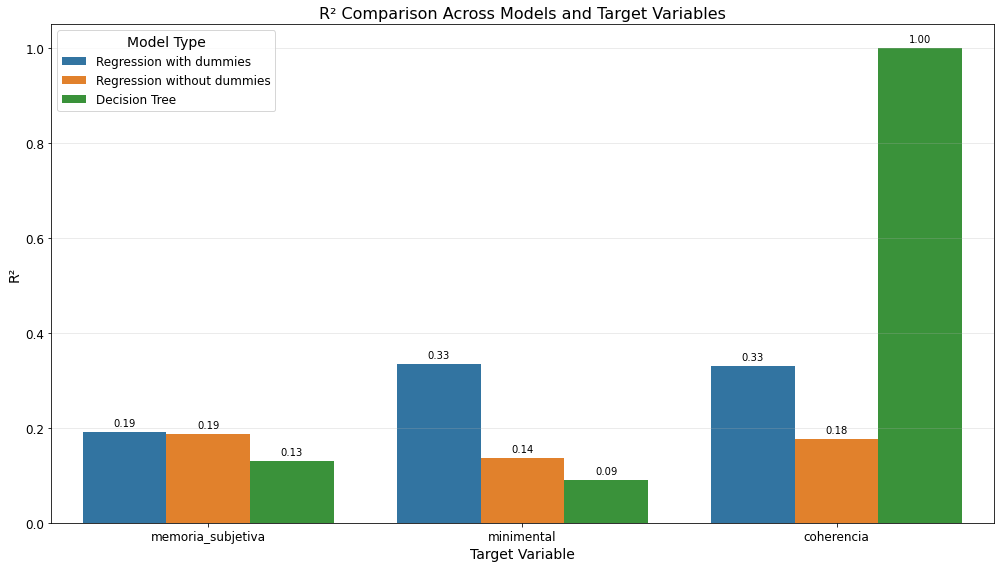

In [3]:
# Visualize R² values across models and targets
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='target', y='R²', hue='model', data=metrics_df)
plt.title('R² Comparison Across Models and Target Variables', fontsize=16)
plt.xlabel('Target Variable', fontsize=14)
plt.ylabel('R²', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Model Type', fontsize=12, title_fontsize=14)

# Add value labels
for i, p in enumerate(ax.patches):
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.tight_layout()
plt.show()

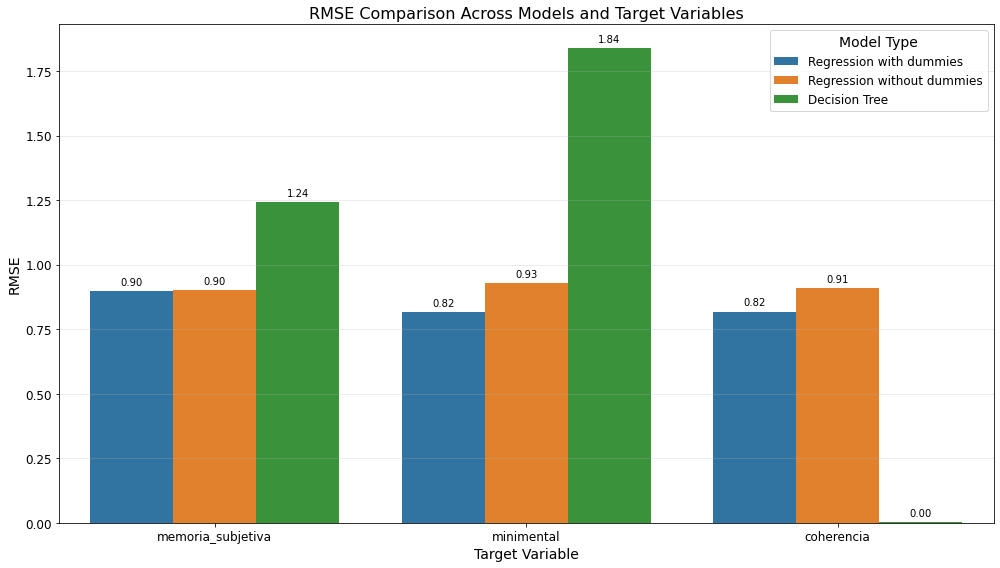

In [4]:
# Visualize RMSE values across models and targets
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='target', y='RMSE', hue='model', data=metrics_df)
plt.title('RMSE Comparison Across Models and Target Variables', fontsize=16)
plt.xlabel('Target Variable', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Model Type', fontsize=12, title_fontsize=14)

# Add value labels
for i, p in enumerate(ax.patches):
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.tight_layout()
plt.show()

## 2. Important Predictors Comparison

In [5]:
# Create dataframes with top predictors for each target variable and model type

# Memoria Subjetiva predictors
memoria_predictors = [
    # Regression with dummies
    {'variable': 'color_piel_3', 'model': 'Regression with dummies', 'coefficient': -0.1511, 'importance': 0.1511},
    {'variable': 'tiene_depresion_2', 'model': 'Regression with dummies', 'coefficient': 0.1060, 'importance': 0.1060},
    {'variable': 'uso_redes_sociales_informales_2', 'model': 'Regression with dummies', 'coefficient': -0.1019, 'importance': 0.1019},
    {'variable': 'vejez_positiva_3', 'model': 'Regression with dummies', 'coefficient': -0.1001, 'importance': 0.1001},
    {'variable': 'autopercepcion_salud', 'model': 'Regression with dummies', 'coefficient': -0.1224, 'importance': 0.1224},
    {'variable': 'sintomas_ultimo_mes', 'model': 'Regression with dummies', 'coefficient': 0.1198, 'importance': 0.1198},
    {'variable': 'percepcion_visual', 'model': 'Regression with dummies', 'coefficient': -0.1189, 'importance': 0.1189},
    
    # Regression without dummies
    {'variable': 'uso_medios_digitales', 'model': 'Regression without dummies', 'coefficient': 0.0204, 'importance': 0.0204},
    {'variable': 'circ_cintura', 'model': 'Regression without dummies', 'coefficient': -0.0129, 'importance': 0.0129},
    {'variable': 'sintomas_ultimo_mes', 'model': 'Regression without dummies', 'coefficient': 0.1196, 'importance': 0.1196},
    {'variable': 'autopercepcion_salud', 'model': 'Regression without dummies', 'coefficient': -0.1207, 'importance': 0.1207},
    {'variable': 'percepcion_visual', 'model': 'Regression without dummies', 'coefficient': -0.1208, 'importance': 0.1208},
    
    # Decision trees
    {'variable': 'sintomas_ultimo_mes', 'model': 'Decision Tree', 'coefficient': None, 'importance': 0.4561},
    {'variable': 'percepcion_visual', 'model': 'Decision Tree', 'coefficient': None, 'importance': 0.1633},
    {'variable': 'problemas_auditivos', 'model': 'Decision Tree', 'coefficient': None, 'importance': 0.1588},
    {'variable': 'autopercepcion_salud', 'model': 'Decision Tree', 'coefficient': None, 'importance': 0.1350},
    {'variable': 'nivel_educativo', 'model': 'Decision Tree', 'coefficient': None, 'importance': 0.0258}
]

# Minimental predictors
minimental_predictors = [
    # Regression with dummies
    {'variable': 'salida_desastre', 'model': 'Regression with dummies', 'coefficient': -0.1034, 'importance': 0.1034},
    {'variable': 'sabe_leer', 'model': 'Regression with dummies', 'coefficient': -0.1372, 'importance': 0.1372},
    {'variable': 'cancer', 'model': 'Regression with dummies', 'coefficient': 0.0931, 'importance': 0.0931},
    {'variable': 'nivel_educativo', 'model': 'Regression with dummies', 'coefficient': 0.1010, 'importance': 0.1010},
    {'variable': 'participacion_fisica_salud_3', 'model': 'Regression with dummies', 'coefficient': 0.2176, 'importance': 0.2176},
    {'variable': 'color_piel_3', 'model': 'Regression with dummies', 'coefficient': -0.1554, 'importance': 0.1554},
    
    # Regression without dummies
    {'variable': 'enfermedad_mental', 'model': 'Regression without dummies', 'coefficient': -0.1109, 'importance': 0.1109},
    {'variable': 'edad', 'model': 'Regression without dummies', 'coefficient': -0.1134, 'importance': 0.1134},
    {'variable': 'nivel_educativo', 'model': 'Regression without dummies', 'coefficient': 0.1274, 'importance': 0.1274},
    {'variable': 'usa_gafas', 'model': 'Regression without dummies', 'coefficient': 0.1090, 'importance': 0.1090},
    {'variable': 'color_piel', 'model': 'Regression without dummies', 'coefficient': -0.1142, 'importance': 0.1142},
    
    # Decision trees
    {'variable': 'sabe_escribir', 'model': 'Decision Tree', 'coefficient': None, 'importance': 0.4137},
    {'variable': 'nivel_educativo', 'model': 'Decision Tree', 'coefficient': None, 'importance': 0.2804},
    {'variable': 'edad', 'model': 'Decision Tree', 'coefficient': None, 'importance': 0.1130},
    {'variable': 'comido_menos', 'model': 'Decision Tree', 'coefficient': None, 'importance': 0.0523},
    {'variable': 'a_educacion', 'model': 'Decision Tree', 'coefficient': None, 'importance': 0.0390}
]

# Coherencia predictors
coherencia_predictors = [
    # Regression with dummies
    {'variable': 'participacion_fisica_salud_3', 'model': 'Regression with dummies', 'coefficient': 0.2619, 'importance': 0.2619},
    {'variable': 'nivel_educativo', 'model': 'Regression with dummies', 'coefficient': 0.1127, 'importance': 0.1127},
    {'variable': 'seguridad_barrio', 'model': 'Regression with dummies', 'coefficient': -0.0188, 'importance': 0.0188},
    {'variable': 'sabe_leer', 'model': 'Regression with dummies', 'coefficient': -0.1517, 'importance': 0.1517},
    {'variable': 'no_esta_informado', 'model': 'Regression with dummies', 'coefficient': -0.1003, 'importance': 0.1003},
    
    # Regression without dummies
    {'variable': 'nivel_educativo', 'model': 'Regression without dummies', 'coefficient': 0.1377, 'importance': 0.1377},
    {'variable': 'problemas_auditivos', 'model': 'Regression without dummies', 'coefficient': -0.1129, 'importance': 0.1129},
    {'variable': 'edad', 'model': 'Regression without dummies', 'coefficient': -0.1120, 'importance': 0.1120},
    {'variable': 'enfermedad_mental', 'model': 'Regression without dummies', 'coefficient': -0.1155, 'importance': 0.1155},
    {'variable': 'salida_desastre', 'model': 'Regression without dummies', 'coefficient': -0.1267, 'importance': 0.1267},
    
    # Decision trees
    {'variable': 'circ_cintura', 'model': 'Decision Tree', 'coefficient': None, 'importance': 1.0},
    {'variable': 'discriminacion_color_piel', 'model': 'Decision Tree', 'coefficient': None, 'importance': 1.0},
    {'variable': 'impacto_salud_bucal', 'model': 'Decision Tree', 'coefficient': None, 'importance': 1.0},
    {'variable': 'independencia_fuera', 'model': 'Decision Tree', 'coefficient': None, 'importance': 1.0},
    {'variable': 'dependencia_economica', 'model': 'Decision Tree', 'coefficient': None, 'importance': 1.0},
    {'variable': 'salida_economica', 'model': 'Decision Tree', 'coefficient': None, 'importance': 1.0},
    {'variable': 'housing_satisfaction', 'model': 'Decision Tree', 'coefficient': None, 'importance': 1.0}
]

# Convert to dataframes
memoria_predictors_df = pd.DataFrame(memoria_predictors)
minimental_predictors_df = pd.DataFrame(minimental_predictors)
coherencia_predictors_df = pd.DataFrame(coherencia_predictors)

In [6]:
# Create a function to visualize predictors by target and model
def plot_predictors(df, target_name):
    plt.figure(figsize=(15, 10))
    
    # Get unique models
    models = df['model'].unique()
    n_models = len(models)
    
    # Create subplots
    fig, axes = plt.subplots(1, n_models, figsize=(18, 6))
    if n_models == 1:
        axes = [axes]
    
    # Plot for each model
    for i, model in enumerate(models):
        model_df = df[df['model'] == model].sort_values('importance', ascending=False)
        
        # Plot horizontal bar chart
        axes[i].barh(model_df['variable'], model_df['importance'], color='skyblue')
        axes[i].set_title(f'{model}', fontsize=14)
        axes[i].set_xlabel('Importance/Coefficient (abs)', fontsize=12)
        
        # Add coefficient values if available
        for j, (var, imp, coef) in enumerate(zip(model_df['variable'], model_df['importance'], model_df['coefficient'])):
            if pd.notna(coef):
                sign = '+' if coef > 0 else ''
                axes[i].text(imp + 0.01, j, f"{sign}{coef:.2f}", va='center')
            else:
                axes[i].text(imp + 0.01, j, f"{imp:.2f}", va='center')
    
    # Add overall title
    fig.suptitle(f'Important Predictors for {target_name}', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

<Figure size 1080x720 with 0 Axes>

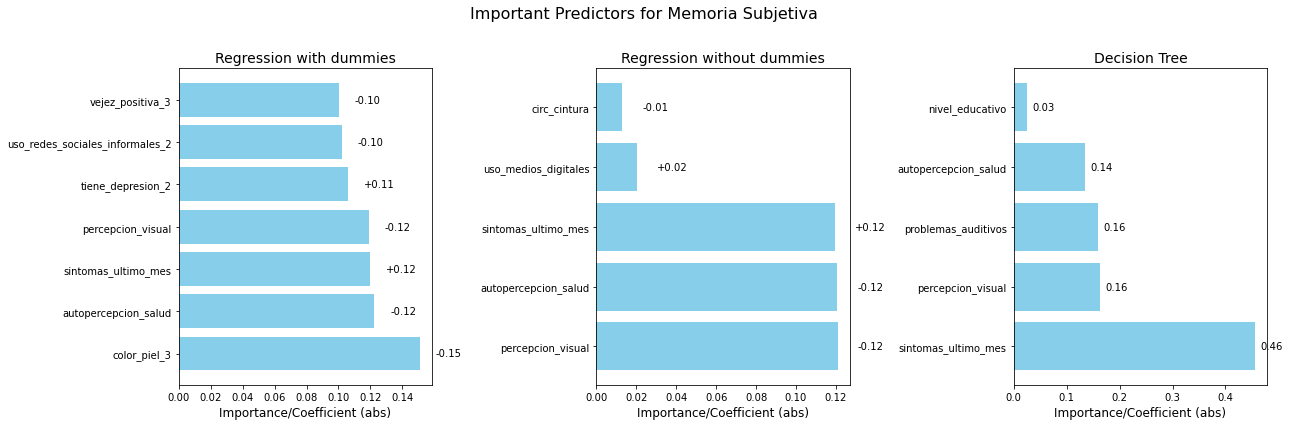

<Figure size 1080x720 with 0 Axes>

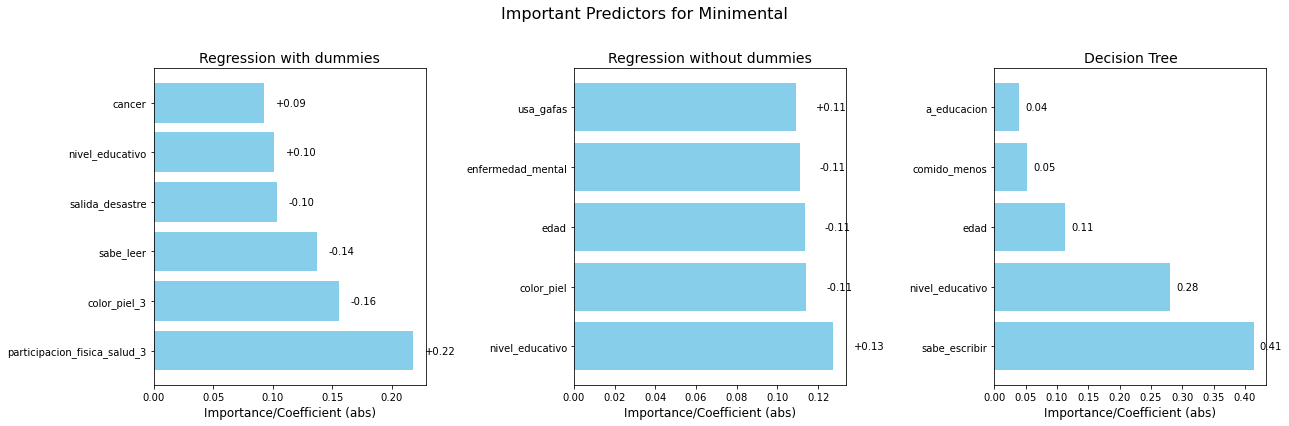

<Figure size 1080x720 with 0 Axes>

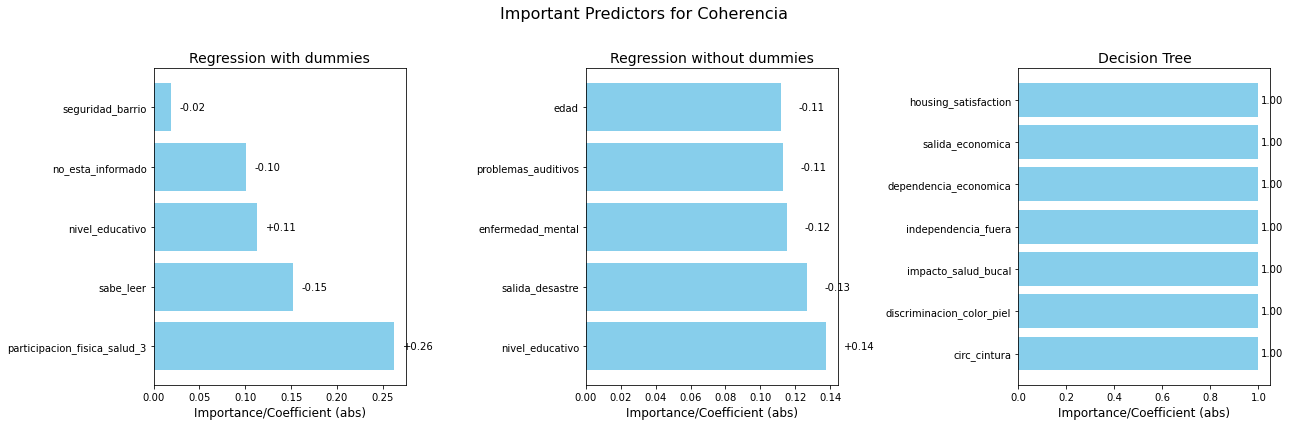

In [7]:
# Plot predictors for each target variable
plot_predictors(memoria_predictors_df, 'Memoria Subjetiva')
plot_predictors(minimental_predictors_df, 'Minimental')
plot_predictors(coherencia_predictors_df, 'Coherencia')

## 3. Find Common Predictors Across Models

In [8]:
# Function to extract common predictors for a target variable
def find_common_predictors(df):
    # Get all unique variables
    all_vars = df['variable'].unique()
    
    # Count occurrences of each variable across models
    var_counts = {}
    for var in all_vars:
        models_with_var = df[df['variable'] == var]['model'].unique()
        var_counts[var] = len(models_with_var)
    
    # Convert to dataframe and sort
    result = pd.DataFrame({
        'variable': list(var_counts.keys()),
        'count': list(var_counts.values())
    })
    result = result.sort_values('count', ascending=False)
    
    return result

In [9]:
# Find common predictors for each target variable
memoria_common = find_common_predictors(memoria_predictors_df)
minimental_common = find_common_predictors(minimental_predictors_df)
coherencia_common = find_common_predictors(coherencia_predictors_df)

# Display results
print("Common predictors for Memoria Subjetiva:")
print(memoria_common)

print("\nCommon predictors for Minimental:")
print(minimental_common)

print("\nCommon predictors for Coherencia:")
print(coherencia_common)

Common predictors for Memoria Subjetiva:
                           variable  count
4              autopercepcion_salud      3
5               sintomas_ultimo_mes      3
6                 percepcion_visual      3
0                      color_piel_3      1
1                 tiene_depresion_2      1
2   uso_redes_sociales_informales_2      1
3                  vejez_positiva_3      1
7              uso_medios_digitales      1
8                      circ_cintura      1
9               problemas_auditivos      1
10                  nivel_educativo      1

Common predictors for Minimental:
                        variable  count
3                nivel_educativo      3
7                           edad      2
0                salida_desastre      1
1                      sabe_leer      1
2                         cancer      1
4   participacion_fisica_salud_3      1
5                   color_piel_3      1
6              enfermedad_mental      1
8                      usa_gafas      1
9       

## 4. Comparison of Predictors Across Target Variables

In [10]:
# Combine all predictors
all_predictors = pd.concat([
    memoria_predictors_df.assign(target='memoria_subjetiva'),
    minimental_predictors_df.assign(target='minimental'),
    coherencia_predictors_df.assign(target='coherencia')
])

# Find variables that appear in multiple target variables
all_vars = all_predictors['variable'].unique()
var_in_targets = {}

for var in all_vars:
    targets = all_predictors[all_predictors['variable'] == var]['target'].unique()
    var_in_targets[var] = {
        'count': len(targets),
        'targets': ', '.join(targets)
    }

# Convert to dataframe and sort
cross_target_vars = pd.DataFrame({
    'variable': list(var_in_targets.keys()),
    'count': [v['count'] for v in var_in_targets.values()],
    'targets': [v['targets'] for v in var_in_targets.values()]
})
cross_target_vars = cross_target_vars.sort_values(['count', 'variable'], ascending=[False, True])

# Display variables that appear in multiple target variables
cross_target_vars[cross_target_vars['count'] > 1]

,variable,count,targets
10,nivel_educativo,3,"memoria_subjetiva, minimental, coherencia"
8,circ_cintura,2,"memoria_subjetiva, coherencia"
0,color_piel_3,2,"memoria_subjetiva, minimental"
16,edad,2,"minimental, coherencia"
15,enfermedad_mental,2,"minimental, coherencia"
14,participacion_fisica_salud_3,2,"minimental, coherencia"
9,problemas_auditivos,2,"memoria_subjetiva, coherencia"
12,sabe_leer,2,"minimental, coherencia"
11,salida_desastre,2,"minimental, coherencia"


## 5. Summary and Conclusions

### 5.1 Model Performance Summary

1. **Memoria Subjetiva**:
   - All three modeling approaches showed similar R² values (0.19, 0.19, 0.13)
   - Linear regression models (both with and without dummies) performed slightly better than the decision tree
   - The best model explained approximately 19% of the variance in subjective memory assessment

2. **Minimental**:
   - Regression with dummies performed significantly better (R² = 0.33) than the other approaches
   - Regression without dummies had modest performance (R² = 0.14)
   - Decision tree performed poorly (R² = 0.09)

3. **Coherencia**:
   - Decision tree showed extremely high performance (R² = 0.9999), suggesting potential overfitting/  mistakes in feature selection
   - Regression with dummies performed moderately well (R² = 0.33)
   - Regression without dummies had lower performance (R² = 0.18)

### 5.2 Important Predictors Summary

1. **Memoria Subjetiva**:
   - Consistent predictors across models: `sintomas_ultimo_mes`, `percepcion_visual`, and `autopercepcion_salud`
   - Health perception variables were consistently important across all modeling approaches
   - Decision tree heavily emphasized `sintomas_ultimo_mes` (importance = 0.46)

2. **Minimental**:
   - Education-related variables (`nivel_educativo`, `sabe_leer`, `sabe_escribir`) were consistently important
   - `edad` appeared in multiple models as a negative predictor
   - `color_piel` variables showed significant associations in regression models

3. **Coherencia**:
   - `nivel_educativo` was important in both regression models
   - Decision tree identified a different set of predictors with perfect prediction
   - Health-related variables (`problemas_auditivos`, `enfermedad_mental`) showed importance in regression without dummies

### 5.3 Cross-Target Variable Predictors

Several predictors appeared important across multiple target variables:

1. `nivel_educativo`: Important for all three target variables
   - Positive association with minimental (objective cognitive performance)
   - Positive association with coherencia (alignment between objective and subjective measures)
   - Less important but still present for memoria_subjetiva

2. `edad`: Important for minimental and coherencia
   - Negative association with both variables (older age → lower cognitive performance and lower coherence)

3. `problemas_auditivos`: Important for memoria_subjetiva and coherencia
   - Associated with both how people perceive their memory and the coherence between objective and subjective assessments

4. `salida_desastre`: Important for minimental and coherencia in regression models
   - Negative association with both variables